##Principal Component Analysis (PCA) & Clustering

#Task 1: Exploratory Data Analysis (EDA)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load dataset

In [2]:
df = pd.read_csv('wine.csv')
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Histograms

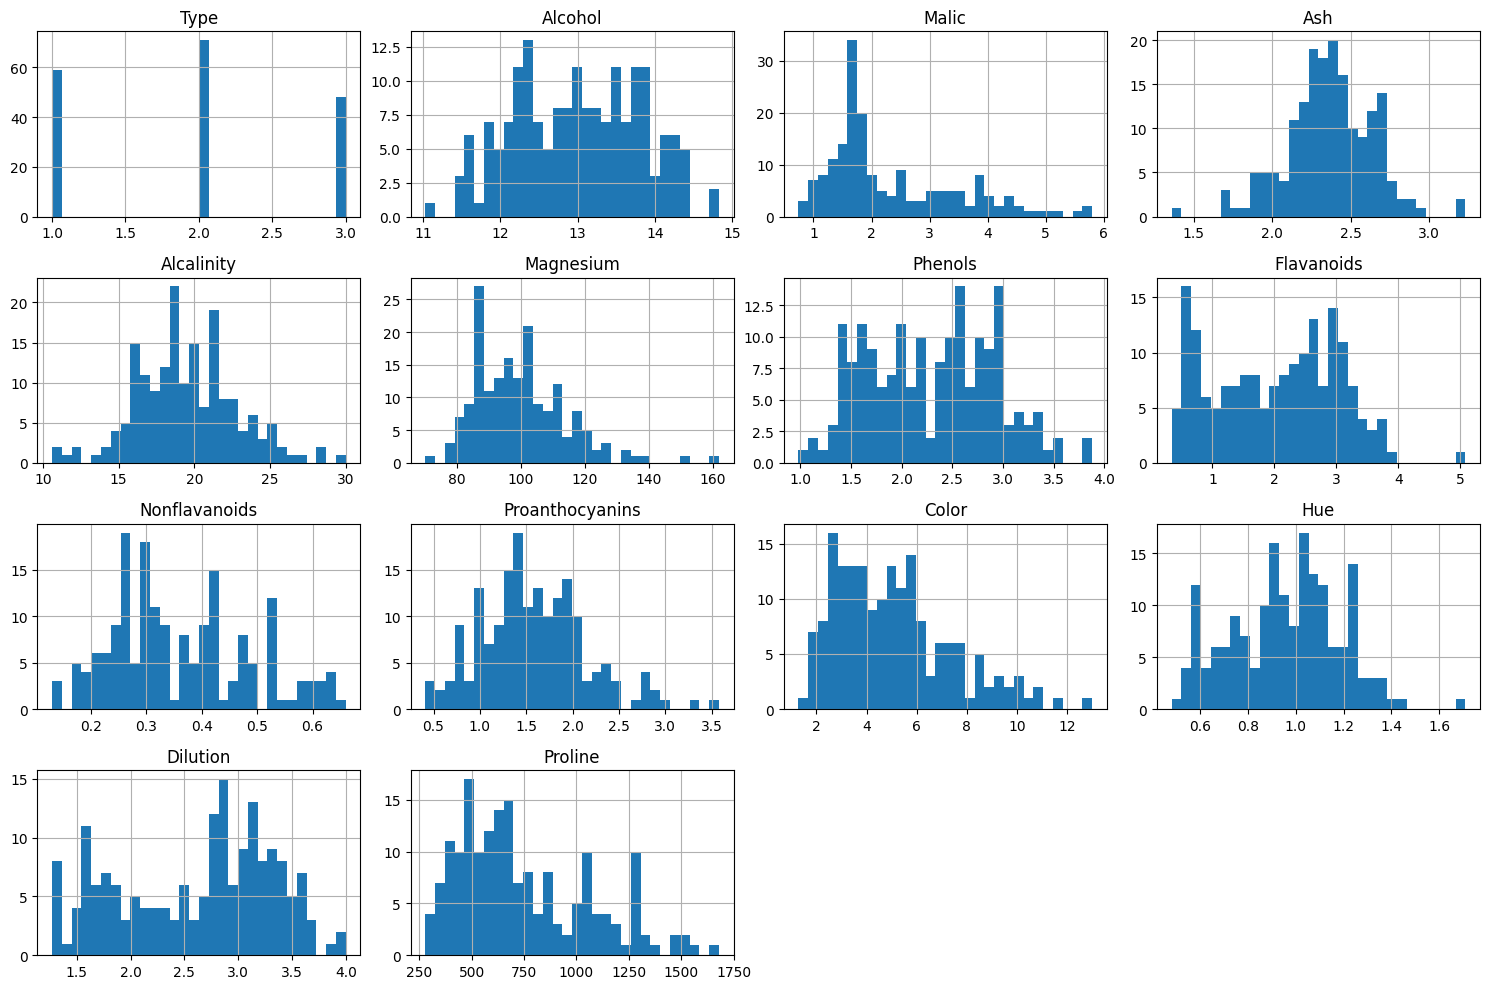

In [3]:
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

Box plots

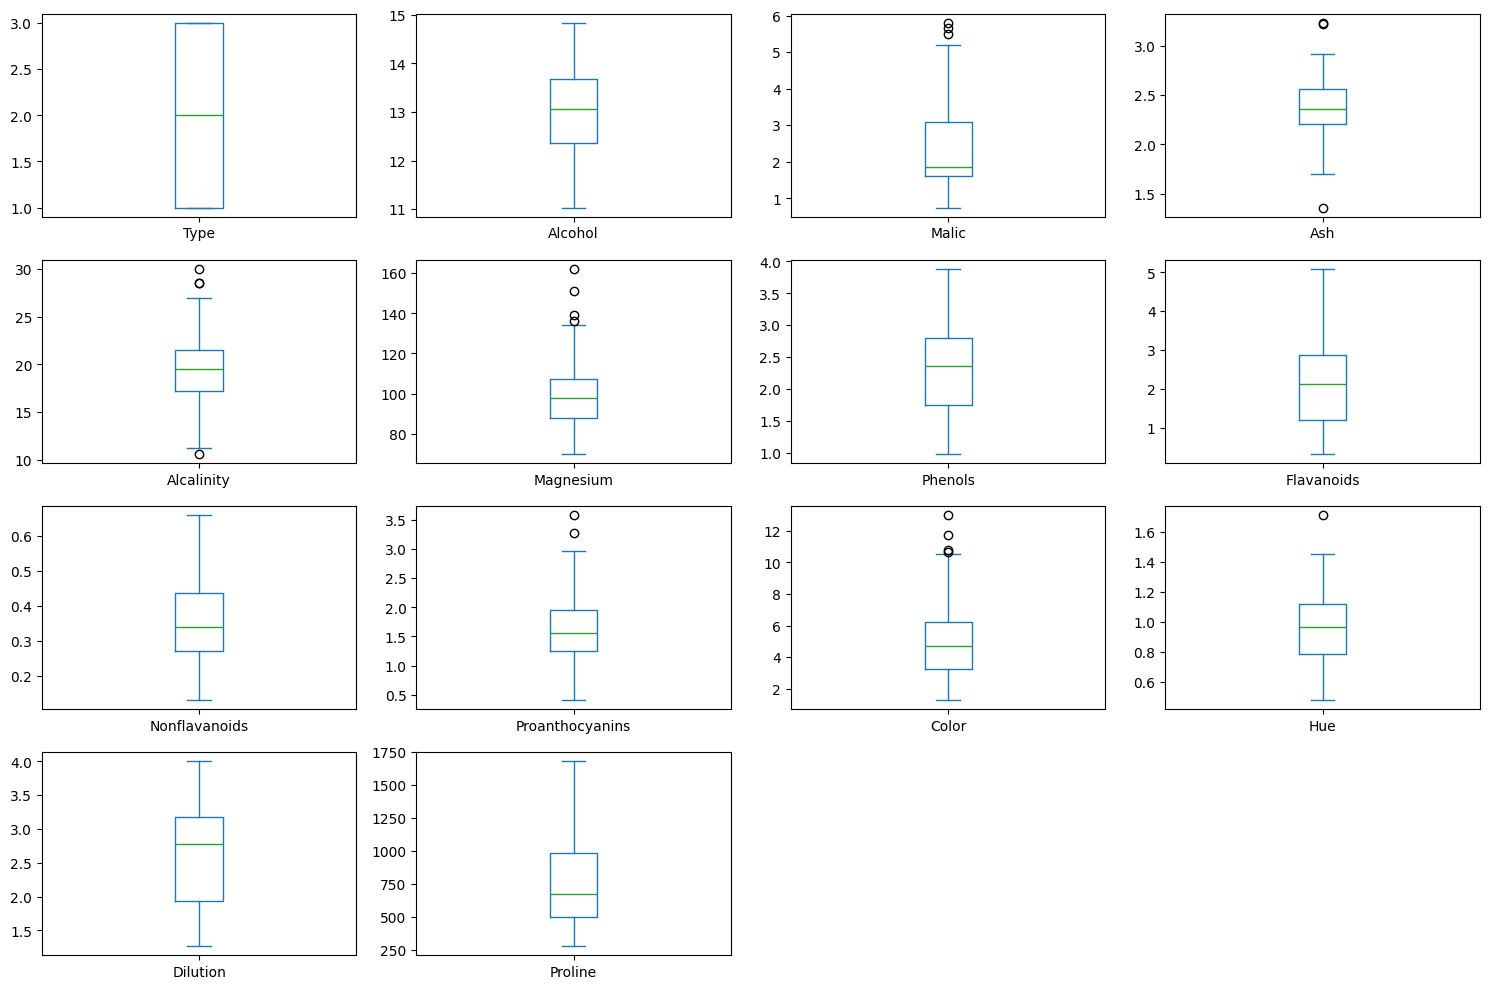

In [4]:
df.plot(kind='box', subplots=True, layout=(4, 4), figsize=(15, 10), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

Correlation matrix

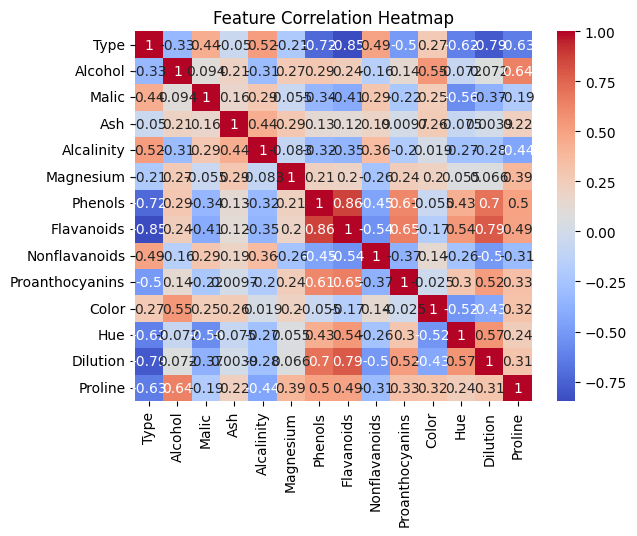

In [5]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

#Task 2: Dimensionality Reduction with PCA

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

Standardize the data

In [7]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

Apply PCA

In [8]:
pca = PCA()
pca_data = pca.fit_transform(scaled_data)


Scree plot (explained variance)

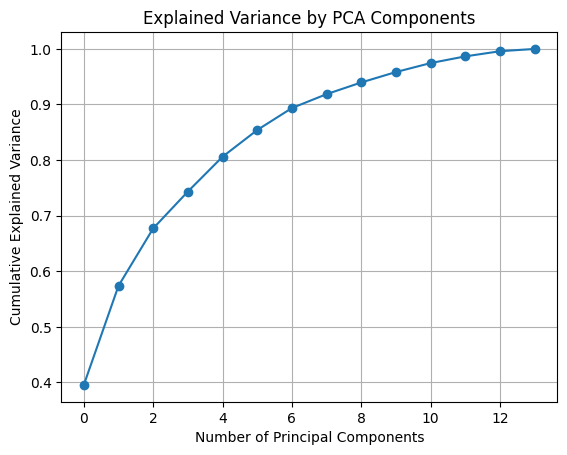

In [9]:
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid()
plt.show()

Choose number of components

In [10]:
pca_n = PCA(n_components=2)
reduced_data = pca_n.fit_transform(scaled_data)


Create DataFrame of PCA results

In [11]:
pca_df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])
pca_df.head()

,PC1,PC2
0,-3.522934,1.453098
1,-2.528858,-0.330019
2,-2.785029,1.036936
3,-3.922588,2.768210
4,-1.407511,0.867773


#Task 3: Clustering with Original Data


In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score


K-Means clustering

In [13]:
kmeans_orig = KMeans(n_clusters=3, random_state=42)
labels_orig = kmeans_orig.fit_predict(scaled_data)



Evaluation

In [14]:
print("Original Data Clustering")
print("Silhouette Score:", silhouette_score(scaled_data, labels_orig))
print("Davies-Bouldin Index:", davies_bouldin_score(scaled_data, labels_orig))


Original Data Clustering
Silhouette Score: 0.30648398324833453
Davies-Bouldin Index: 1.315707552261773


Visualization (using first 2 features)


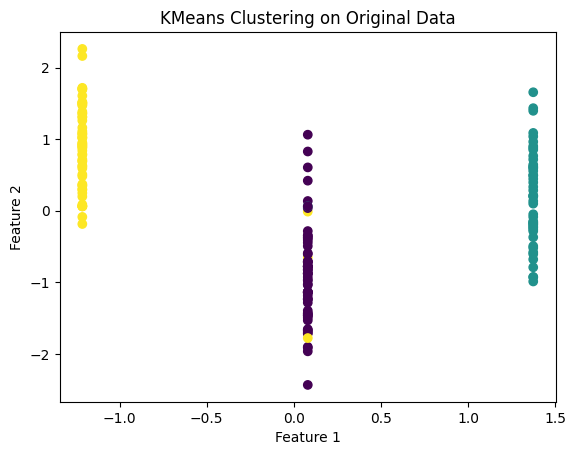

In [15]:
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=labels_orig, cmap='viridis')
plt.title("KMeans Clustering on Original Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


#Task 4: Clustering with PCA Data


K-Means on PCA-transformed data

In [16]:
kmeans_pca = KMeans(n_clusters=3, random_state=42)
labels_pca = kmeans_pca.fit_predict(pca_df)

Evaluation

In [17]:
print("PCA Data Clustering")
print("Silhouette Score:", silhouette_score(pca_df, labels_pca))
print("Davies-Bouldin Index:", davies_bouldin_score(pca_df, labels_pca))


PCA Data Clustering
Silhouette Score: 0.6024415520362845
Davies-Bouldin Index: 0.5397078562575713


 Visualization

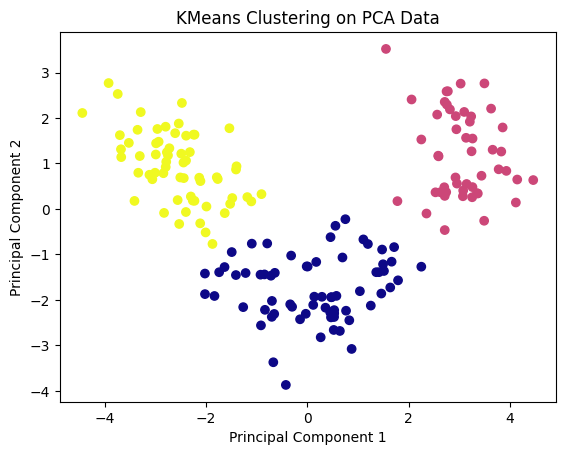

In [18]:
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=labels_pca, cmap='plasma')
plt.title("KMeans Clustering on PCA Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

#Task 5: Comparison and Analysis


###Observations:
- Compare silhouette scores and Davies–Bouldin index.
- Did PCA improve the clustering results?
- How do the cluster boundaries look in PCA vs original space?
- Was any useful structure lost or preserved?



#Task 6: Conclusion and Insights


### 📝 Key Takeaways:

- PCA reduced the data dimensions from [original_dim] to 2.
- It [improved/worsened] the clustering performance.
- Use PCA when:
  - Dimensionality is high
  - There’s multicollinearity
  - You want to visualize clusters in 2D

- Avoid PCA when:
  - Original features are important for interpretability